In [1]:
# Preprocess the texts in dataset

import numpy as np
from gensim import models, corpora
 
tokenized_data = np.load('toxic_classification_traindata_2.npy')
    
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

unable to import 'smart_open.gcs', disabling that module


In [6]:
# Finding the optimum number of topics in LSI model

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [7]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_data, limit=40, step=6)

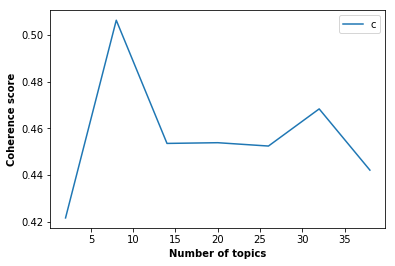

In [8]:
# Plotting the coherence score based on the number of models

import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics", fontweight='bold')
plt.ylabel("Coherence score", fontweight='bold')
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Save the LSI model with best coherence score from LSI model
lsi_model_bcs = model_list[coherence_values.index(max(coherence_values))]
lsi_model_bcs.save('lsi_bcs.model')

lsi_model_20 = model_list[3]
lsi_model_20.save('lsi_20.model')

In [12]:
import joblib

joblib.dump(lsi_model_bcs, 'lsi_bcs.jl')
joblib.dump(lsi_model_20, 'lsi_20.jl')

['lsi_20.jl']

In [13]:
# Store the topic words in an array

topic_words_bcs = []
for idx in range(lsi_model_bcs.num_topics):
    words = [item[0] for item in lsi_model_bcs.show_topic(idx, topn=20)]
    topic_words_bcs.append(words)
    
topic_words_20 = []
for idx in range(lsi_model_20.num_topics):
    words = [item[0] for item in lsi_model_20.show_topic(idx, topn=20)]
    topic_words_20.append(words)

In [14]:
# Save the topic words in a text file

with open("lsi_topic_words_bcs.txt", "w") as txt_file:
    for line in topic_words_bcs:
        txt_file.write(" ".join(line) + "\n")
txt_file.close()

with open("lsi_topic_words_20.txt", "w") as txt_file:
    for line in topic_words_20:
        txt_file.write(" ".join(line) + "\n")
txt_file.close()

In [18]:
topic_distribution = []
for text in tokenized_data:
    bow = dictionary.doc2bow(text)
    a = [obj for idx,obj in lsi_model[bow]]
    topic_distribution.append(a)

In [19]:
print(topic_distribution[0])

[0.00047718460840672297, -8.582121025916092e-06]


In [11]:
# loading a model

import joblib

lsi_model = joblib.load('lsi_2.jl')